In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# create synthetic transactions
n = 500
df = pd.DataFrame({
"transaction_id": range(1, n+1),
"amount": np.random.uniform(20, 300, n)
})

# processor profiles
processors = {
    "A": {"success_rate": 0.95, "cost": 0.30},
    "B": {"success_rate": 0.88, "cost": 0.15},
    "C": {"success_rate": 0.75, "cost": 0.05}
}

# simulate processing
results = []

for p, info in processors.items():
    success = np.random.binomial(1, info["success_rate"], n)
    total_success = success.sum()
    fail = n - total_success
    total_cost = n * info["cost"]

    results.append({
        "processor": p,
        "success_rate": total_success / n,
        "failures": fail,
        "total_cost": total_cost
    })

stats_df = pd.DataFrame(results)
print(stats_df)


  processor  success_rate  failures  total_cost
0         A         0.968        16       150.0
1         B         0.882        59        75.0
2         C         0.758       121        25.0


# ⭐ VISUALS
- Success rate comparison


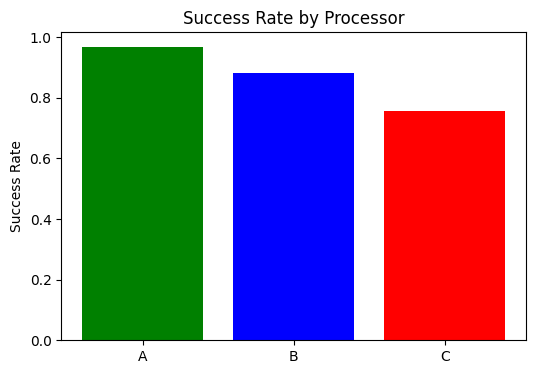

In [9]:


plt.figure(figsize=(6,4))
plt.bar(stats_df["processor"], stats_df["success_rate"], color=["green","blue","red"])
plt.title("Success Rate by Processor")
plt.ylabel("Success Rate")
plt.show()



- Processing cost comparison



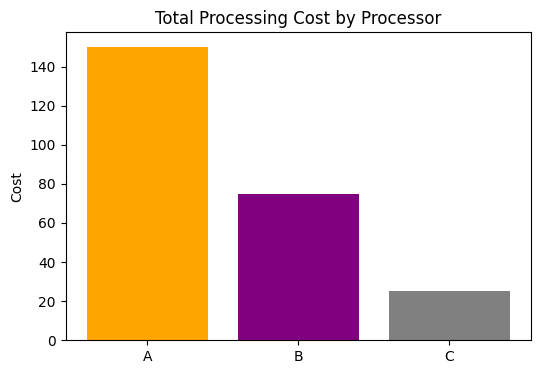

In [10]:
plt.figure(figsize=(6,4))
plt.bar(stats_df["processor"], stats_df["total_cost"], color=["orange","purple","gray"])
plt.title("Total Processing Cost by Processor")
plt.ylabel("Cost")
plt.show()


- Recommendation visualization


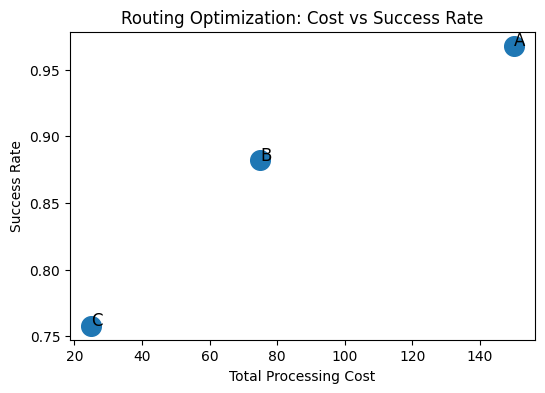

In [11]:

plt.figure(figsize=(6,4))
plt.scatter(stats_df["total_cost"], stats_df["success_rate"], s=200)
for i, row in stats_df.iterrows():
    plt.text(row["total_cost"], row["success_rate"], row["processor"], fontsize=12)
plt.title("Routing Optimization: Cost vs Success Rate")
plt.xlabel("Total Processing Cost")
plt.ylabel("Success Rate")
plt.show()

- Failures by Processor


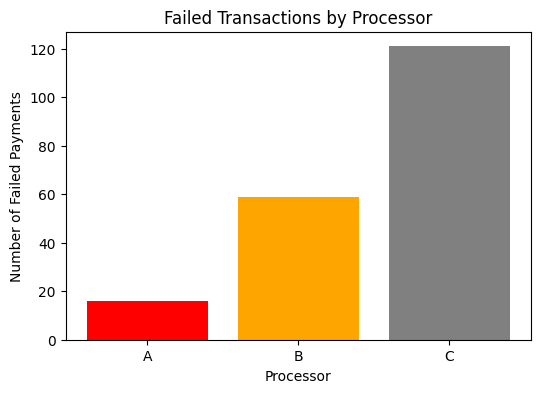

In [12]:
plt.figure(figsize=(6,4))
plt.bar(stats_df["processor"], stats_df["failures"], color=["red","orange","gray"])
plt.title("Failed Transactions by Processor")
plt.ylabel("Number of Failed Payments")
plt.xlabel("Processor")
plt.show()

- Cost per Successful Transaction


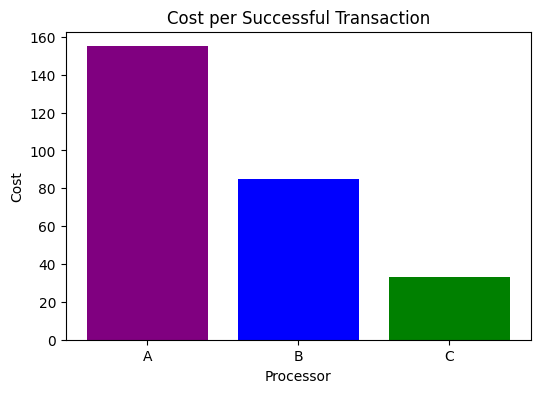

In [13]:

stats_df["cost_per_success"] = stats_df["total_cost"] / stats_df["success_rate"]

plt.figure(figsize=(6,4))
plt.bar(stats_df["processor"], stats_df["cost_per_success"], color=["purple","blue","green"])
plt.title("Cost per Successful Transaction")
plt.ylabel("Cost")
plt.xlabel("Processor")
plt.show()




- Revenue Saved by Routing Optimization


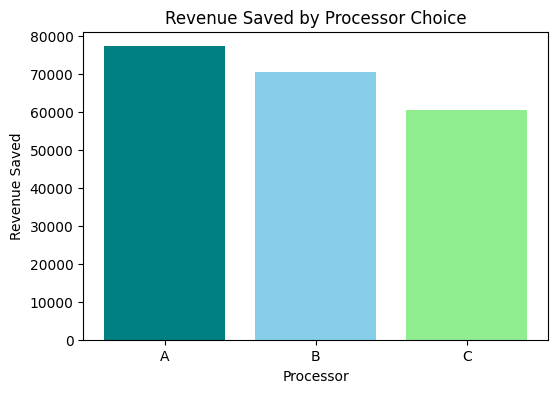

In [14]:


# assume revenue equals transaction amount
potential_revenue = df["amount"].sum()

stats_df["revenue_lost"] = (1 - stats_df["success_rate"]) * potential_revenue
stats_df["revenue_saved_if_used"] = potential_revenue - stats_df["revenue_lost"]

plt.figure(figsize=(6,4))
plt.bar(stats_df["processor"], stats_df["revenue_saved_if_used"], color=["teal","skyblue","lightgreen"])
plt.title("Revenue Saved by Processor Choice")
plt.ylabel("Revenue Saved")
plt.xlabel("Processor")
plt.show()